## PREDICTION USING UNSUPERVISED LEARNING


### AUTHOR: SHIKHA

#### DATA SCIENCE AND BUSINESS ANALYTICS INTERN MARCH 2021(1 MONTH)

### THE SPARKS FOUNDATION

### __ __ __ __ __ __ __ 

## OBJECTIVE

#### From the given 'Iris dataset' ,predict the optimum no. of clusters and the represent it visually

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#READING THE DATASET
df=pd.read_csv(r"iris.csv")

In [3]:
#CHECKING SHAPE OF DATASET
df.shape

(150, 6)

In [4]:
#QUICK GLANCE AT DATA
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#INFORMATION OF THE DATA AND DATATYPES 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#CHECKING FOR NULL VALUES IN THE DATASET
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#DESCRIBING THE DATA
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#REMOVING THE ID COLUMN FROM THE DATASET
df=df.iloc[:,1:]

In [9]:
#QUICK GLANCE AT DATA
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## PREPARING DATASET

#### CHECKING FOR OUTLIERS IN THE DATA

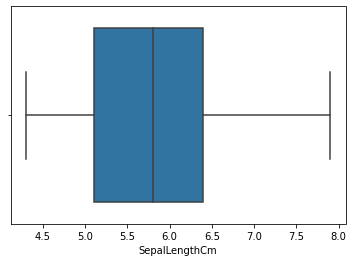

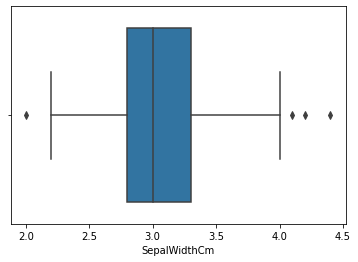

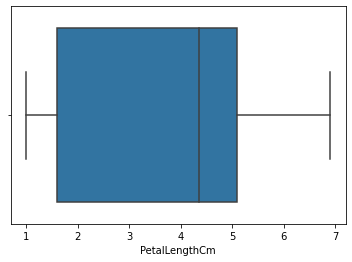

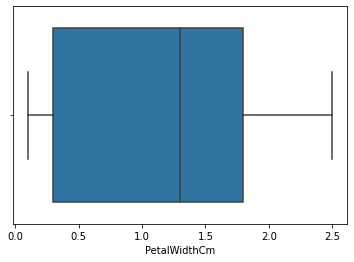

In [10]:
#PLOTTING THE COLUMNS TO CHECK FOR OUTLIERS
for col in df.columns[:-1]:
    sns.boxplot(df[col])
    plt.show()

### FEATURE NAME : SepalWidthCm  contains few outliers 

In [22]:
#INTERQUARTILE RANGE
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.5

In [23]:
#CALCULATING THE LOWER AND UPPER BOUND OF THE ACCEPTABLE WIDTH OF THE SEPALS.
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR
print("lower bound : {}\nupper bound : {}".format(lower_bound,upper_bound))


lower bound : 2.05
upper bound : 4.05


In [24]:
#REMOVING OUTLIERS
df=df[(df['SepalWidthCm']>=lower_bound) & (df['SepalWidthCm']<=upper_bound)]

In [27]:
dff=df.iloc[:,[0,1,2,3]].values

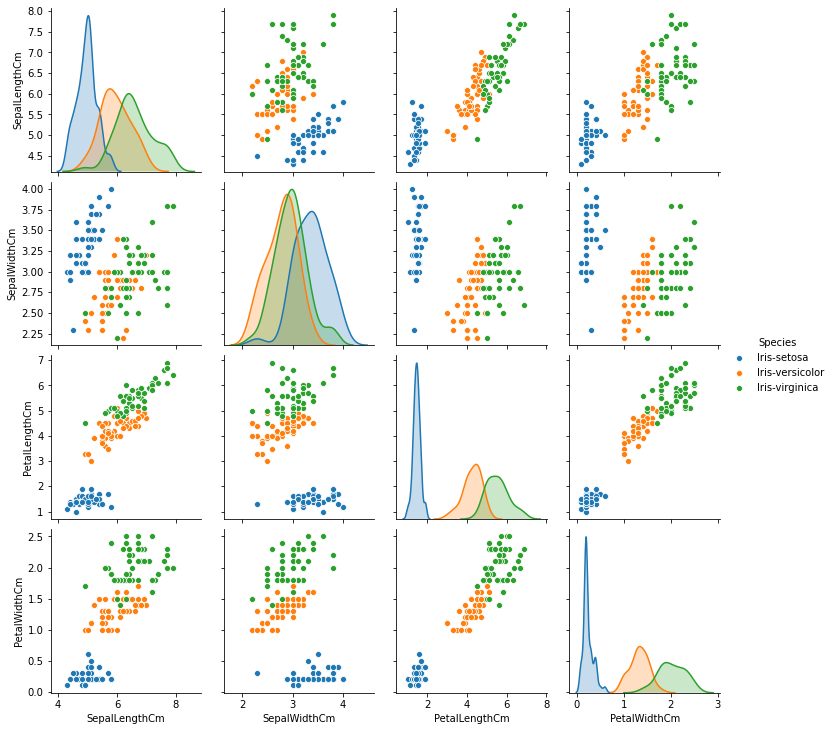

In [28]:
sns.pairplot(data=df,hue="Species")

In [29]:
#importing the library
from sklearn.cluster import KMeans
#choose the best no. of clusters
within_c_sum_sqr=[]
for clusters in range(1, 15):
    kmeans = KMeans(n_clusters = clusters, max_iter = 300, random_state = 0,init='k-means++',n_init=10)
    kmeans.fit(dff)
    within_c_sum_sqr.append(kmeans.inertia_) #interia: Sum of distances of samples to their closest cluster center
    
    
    
    

Text(0, 0.5, 'Within Sum Of Squares')

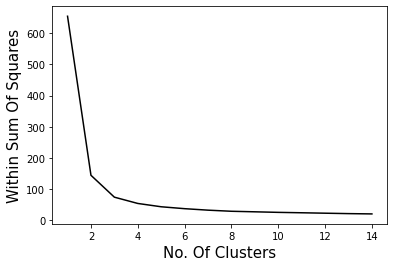

In [31]:
#elbow test to get the optimum nos of clusters
plt.plot(range(1,15),within_c_sum_sqr,c="black")
plt.xlabel("No. Of Clusters",size=15)
plt.ylabel("Within Sum Of Squares",size=15)

In [32]:
#with the elbow test we get the optimum nos. of clusters to be 3

KMeans_model=KMeans(n_clusters=3,max_iter=300,init='k-means++',n_init=10,random_state=0)
model_pred=KMeans_model.fit_predict(dff)


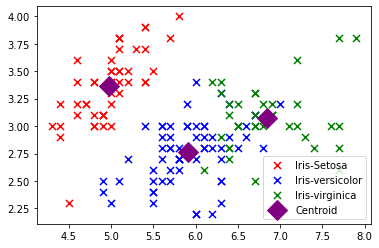

In [34]:
#visualzing the clusters with their centroids 
plt.scatter(dff[model_pred==0,0], dff[model_pred== 0, 1],s = 50, c = 'red',label="Iris-Setosa",marker='x')
plt.scatter(dff[model_pred==1,0], dff[model_pred==1, 1], s = 50, c = 'blue',label="Iris-versicolor",marker='x')
plt.scatter(dff[model_pred==2,0], dff[model_pred==2, 1],s = 50, c = 'green',label="Iris-virginica",marker='x')
plt.scatter(KMeans_model.cluster_centers_[:,0],KMeans_model.cluster_centers_[:,1],s=200,c='purple',marker='D',label='Centroid')
plt.legend()